## Deadline

Wednesday, November 22, 2017, 11:59PM

## Important notes

- When you push your Notebook to GitHub, all the cells must already have been evaluated.
- Don't forget to add a textual description of your thought process and of any assumptions you've made.
- Please write all your comments in English, and use meaningful variable names in your code.

## Question 1: Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 5 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to brush up your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

#### 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?

#### 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

#### 3. A propsensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)

#### 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?


#### 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


#### 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?


___
___
___

Importing the libraries we will need for the homework

In [129]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

## Question 1: Resolution

### Thought process and Implementation plan:
The objective of this exercise is to analyze the effect of a training program on an individual's earnings. 

** Loading and Cleaning the Dataset ** 

The dataset is provided in a csv file containing the suss-mentioned categories : 
- *treat* : whether the subject followed the tranining program, binary value
- *age* : the age of the subject
- *educ* : the number of years of education 
- *race* : Black, White or Hispanic
- *married* : whether the subject is married or not, binary value
- *nodegree* : whether the subject has a degree (1 if they don't, 0 if they do)
- *re74*, *re75* and *re78*: earnings for the given year

The dtypes and unique values of the columns were verified to make sure that there weren't any suprises along the way. 



**1. Naive Analysis**

The objective here was to quickly assess whether having followed the training program had an influence on the salary. Therefore we wanted to compare simply the *re78* for people with and without treatment. For that we used the groupby functionality. To obtain statistical information we used the describe functionality of the dataframes and computed the correlation between having taken the treatment and the salary. We plotted the histograms of the data with treatment, without treatment and overall with a boxplot to explicit certain statistical aspects of the data. We also plotter the boxplots of with and without treatment against one another with a swarmplot to determine where the datapoints lie. All of this was done with multiple functions so that they can be reused in following questions


**2. Closer Look **


When looking at the data we noticed that there wasn't a white column. This column was added manually and individuals were set to 1 if they were neither black nor hispanic.

We also noted that certain people did not have any salaries for any of the years where there was an inquiry on the revenue. We assumed that these people were not looking for jobs. They could be either students (given the young age for some, i.e. 22), others could have gone into early retirement or rely on their spouse (the study was also conducted with housewives) or inheritance for example. That is why these people were removed as the objective is to analyze the effect of the training program on the salary.

We also noted that there were people who did not have salaries for the years preceeding the training program. As we do not know what job each person had, we cannot rely on a baseline which is why we decided to remove these people from the dataset. In the same way, we also removed people who had salaries before the treatment and no salary afterwards to avoid skewing the results.

**3. Propensity Score Model**


**4. Balancing the Dataset Via Matching**



**5. Balancing Groups Further**


**6. A Less Naive Analysis**



___
___
___




### 1.0 Loading and Cleaning the Dataset


In [81]:
# Loading the csv file
data = pd.read_csv("lalonde.csv")

# Adding the white column
data['white'] = (data["black"] + data["hispan"]<1).astype(int)


There are 350 subjects left after cleaning from the original 614


,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white
110,NSW111,1,20,9,1,0,0,1,6083.9940,0.00000,8881.6650,0
111,NSW112,1,17,9,0,1,0,1,445.1704,74.34345,6210.6700,0
113,NSW114,1,18,11,1,0,0,1,858.2543,214.56360,929.8839,0
115,NSW116,1,21,12,0,0,0,0,3670.8720,334.04940,12558.0200,1
116,NSW117,1,27,12,1,0,0,0,2143.4130,357.94990,22163.2500,0
117,NSW118,1,20,12,1,0,0,0,0.0000,377.56860,1652.6370,0
118,NSW119,1,19,10,1,0,0,1,0.0000,385.27410,8124.7150,0
119,NSW120,1,23,12,1,0,0,0,5506.3080,501.07410,671.3318,0
120,NSW121,1,29,14,1,0,0,0,0.0000,679.67340,17814.9800,0
121,NSW122,1,18,10,1,0,0,1,0.0000,798.90790,9737.1540,0


Functions used for analysis 
** ADD EXPLANATIONS**

In [260]:
def normal_distribution_test(data):
    k2, p = scipy.stats.normaltest(data)
    if p>0.05:
        print("\tThe null hypothesis cannot be rejected")
        return False
    else :
        print("\tThe null hypothesis can be rejected")
        return True

def same_distribution_test(data1, data2):
    stats, p = scipy.stats.kruskal(data1, data2)
    if p>0.05:
        print("\tThe null hypothesis cannot be rejected")
        return False
    else :
        print("\tThe null hypothesis can be rejected")
        return True

def statistical_description(df, col):

    print("Testing whether the entire data is normally distributed")        
    all_normal = normal_distribution_test(list(df[col]))
    
    print("Testing whether the results with treatment are normally distributed")        
    treat_normal = normal_distribution_test(list(df.loc[df['treat'] == 1, col]))
    
    print("Testing whether the results without treatment are normally distributed")        
    no_treat_normal = normal_distribution_test(list(df.loc[df['treat'] == 0, col]))
       
    print("Testing whether the data comes from the same distributions")
    same_distribution_test(list(df.loc[df['treat'] == 0, col]),\
                           list(df.loc[df['treat'] == 1, col]))
    
    print("Computing correlation between Treatment and {}".format(col))
    # Taking into account whether the data is normally distributed or not
    # to select the correlatoin type
    if all_normal or (treat_normal and no_treat_normal):
        corr_type = "pearson"   
    else:
        corr_type = "spearman"

    correlation = df[[col, "treat"]].corr(corr_type)
    print("\t{} correlation between treatment and {} : {:4f}".format(corr_type, col, correlation.loc["treat", col]))

def histogram_boxplot(df, col, title):
    x = list(df[col])
    ax = sns.distplot(x)
    ax2 = ax.twinx()
    sns.boxplot(x=x, ax=ax2)
    ax2.set(ylim=(-.5, 10))  
    ax.set_xlabel(col)
    ax.set_ylabel("percentage")
    ax.set_title(title)
    
def plotting_data(df, col):
    plt.figure(figsize=(10, 10))
    data = df.copy()
    
    # Histograms with boxplots and distribution
    
    plt.subplot(2,2,1)
    histogram_boxplot(df.loc[df["treat"] == 1], col, "With Treatment")
    
    plt.subplot(2,2,2)
    histogram_boxplot(df.loc[df["treat"] == 0], col, "Without Treatment")
    
    plt.subplot(2,2,3)
    histogram_boxplot(df, col, "With and Without Treatment")
    
    # Boxplots with datapoints
    plt.subplot(2,2,4)
    data[col] = df[col].astype('category')
    ax = sns.boxplot(x=col, y="treat", data=data, orient="h")
    ax = sns.swarmplot(x=col, y="treat", data=data, color=".25", orient="h")
    
    

### 1.1. Naive Analysis

** Raw Data **

We started by recovering certain non parametric metrics regarding the raw data and plotting the correponding boxplots

In [261]:
statistical_description(data, "re78")

print("Describing the data with parametric and non parametric metrics")
data[["re78", "treat"]].groupby("treat").describe()

Testing whether the entire data is normally distributed
	The null hypothesis can be rejected
Testing whether the results with treatment are normally distributed
	The null hypothesis can be rejected
Testing whether the results without treatment are normally distributed
	The null hypothesis can be rejected
Testing whether the data comes from the same distributions
	The null hypothesis cannot be rejected
Computing correlation between Treatment and re78
	pearson correlation between treatment and re78 : -0.039033
Describing the data with parametric and non parametric metrics


re78                                                                \
       count         mean          std  min       25%       50%        75%   
treat                                                                        
0      429.0  6984.169742  7294.161791  0.0  220.1813  4975.505  11688.820   
1      185.0  6349.143530  7867.402218  0.0  485.2298  4232.309   9642.999   

                 
            max  
treat            
0      25564.67  
1      60307.93

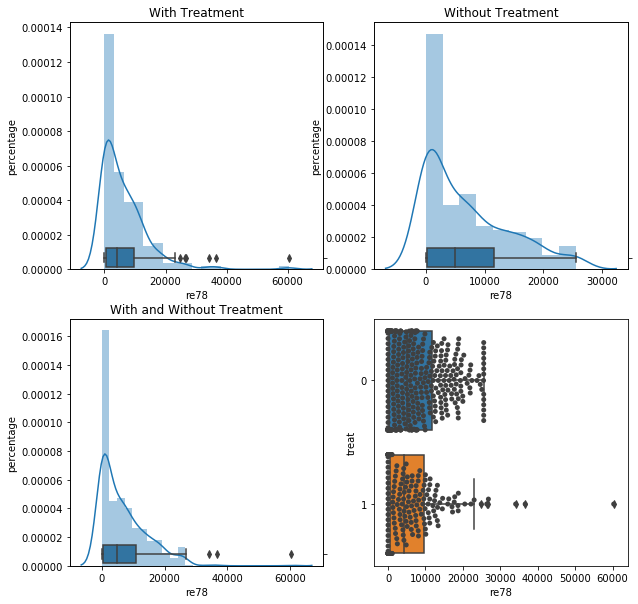

In [262]:
plotting_data(data, "re78")

**Looking at the data description and boxplot :**

Given the average revenues it would even seem that following the training program actually has a negative impact. Looking at the boxplot it would even seem that a larger portion of people suffer from lower salaries (looking at the difference between q3 and q1). However there are certain outlyers with significantly higher salaries when having followed the training program. This may be that there are certain people which benefitted significantly from the traning program.


**Looking at the statistical results :**

Both treatment and no treatment come from the same distribution but the distribution is not normal which can also be seen on the histograms and boxplot. This could indicate that there is no difference between having taken the treatment or not. To compute the correlation we must use a non parametric correlation method such as the spearman correlation. This correlation is quite low (-0.04) which would indicate that there is no link between the revenue in 78 and having followed the training program. 

### 1.2. Closer Look

** Cleaning the Data **

In [121]:
# Cleaning the data
clean_data = data.drop(data.index[(data["re74"] < 1)& (data["re75"] < 1)])
clean_data.drop(clean_data.index[(clean_data["re78"] < 1)], axis = 0, inplace = True)

# Printing the results
print("There are {} subjects left after cleaning from the original {}".format(len(clean_data), len(data)))
clean_data.head(10)

There are 350 subjects left after cleaning from the original 614


,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white
110,NSW111,1,20,9,1,0,0,1,6083.9940,0.00000,8881.6650,0
111,NSW112,1,17,9,0,1,0,1,445.1704,74.34345,6210.6700,0
113,NSW114,1,18,11,1,0,0,1,858.2543,214.56360,929.8839,0
115,NSW116,1,21,12,0,0,0,0,3670.8720,334.04940,12558.0200,1
116,NSW117,1,27,12,1,0,0,0,2143.4130,357.94990,22163.2500,0
117,NSW118,1,20,12,1,0,0,0,0.0000,377.56860,1652.6370,0
118,NSW119,1,19,10,1,0,0,1,0.0000,385.27410,8124.7150,0
119,NSW120,1,23,12,1,0,0,0,5506.3080,501.07410,671.3318,0
120,NSW121,1,29,14,1,0,0,0,0.0000,679.67340,17814.9800,0
121,NSW122,1,18,10,1,0,0,1,0.0000,798.90790,9737.1540,0


### 1.3. Propensity Score Model


### 1.4. Balancing the Dataset Via Matching


### 1.5. Balancing Groups Further


### 1.6. A Less Naive Analysis


___
___
___

## Question 2: Applied ML

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project if you plan to work with text!

1. Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).


2. Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.

___
___
___

In [60]:
data

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0
5,NSW6,1,22,9,1,0,0,1,0.0,0.0,4056.4940,0
6,NSW7,1,23,12,1,0,0,0,0.0,0.0,0.0000,0
7,NSW8,1,32,11,1,0,0,1,0.0,0.0,8472.1580,0
8,NSW9,1,22,16,1,0,0,0,0.0,0.0,2164.0220,0
9,NSW10,1,33,12,0,0,1,0,0.0,0.0,12418.0700,1
